# Example 3: Deep Formulas

The orignal Kolmogorov-Arnold theorem says that it suffices to have 2-Layer function composition (inner and outer functions), but the functions might be non-smooth or even fractal. We generalize KA representation to arbitrary depths. An example a 2-Layer KAN (with smooth activations) is unable to do is: $f(x_1,x_2,x_3,x_4)={\rm exp}({\rm sin}(x_1^2+x_2^2)+{\rm sin}(x_3^2+x_4^2))$, which requires at least 3-Layer KANs.

### Three-layer KAN

In [24]:
from kan import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 4D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 3 grid intervals (grid=3).
model = KAN(width=[4,2,1,1], grid=3, k=3, seed=1, device=device)
f = lambda X: X[:, 0] / (X[:, 1] * X[:, 2]) + X[:, 3]
dataset = create_dataset(f, n_var=4,ranges=[[0,0.5], [0, 0.5], [0, 0.5], [0, 0.5]], train_num=3000, device=device)

# train the model
model.fit(dataset, opt="LBFGS", steps=20, lamb=0.002, lamb_entropy=2.);

cpu
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.50e+02 | test_loss: 7.85e+02 | reg: 4.23e+04 | : 100%|█| 20/20 [00:13<00:00,  1.51it

saving model version 0.1


In [25]:
model = model.prune(edge_th=1e-2)

saving model version 0.2


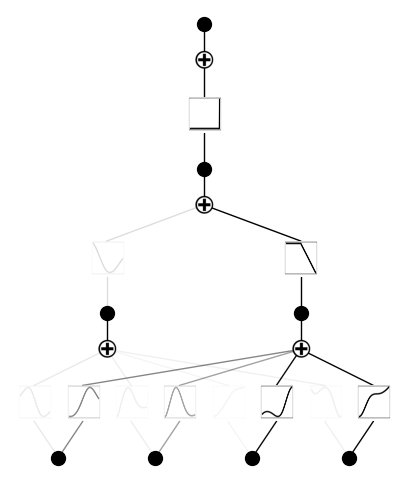

In [26]:
model.plot()

In [27]:
grids = [3,5,10,20,50]
#grids = [5]

train_rmse = []
test_rmse = []

for i in range(len(grids)):
    #model = KAN(width=[4,2,1,1], grid=grids[i], k=3, seed=0, device=device).initialize_from_another_model(model, dataset['train_input'])
    model = model.refine(new_grid=grids[i])#revised from grid=grids[i]
    results = model.fit(dataset, opt="LBFGS", steps=50, stop_grid_update_step=20);
    train_rmse.append(results['train_loss'][-1].item())
    test_rmse.append(results['test_loss'][-1].item())

saving model version 0.3


| train_loss: 3.43e+02 | test_loss: 9.41e+02 | reg: 4.23e+04 | : 100%|█| 50/50 [00:16<00:00,  2.95it


saving model version 0.4
saving model version 0.5


| train_loss: 3.43e+02 | test_loss: 8.31e+02 | reg: 4.23e+04 | : 100%|█| 50/50 [00:10<00:00,  4.90it


saving model version 0.6
saving model version 0.7


| train_loss: 3.43e+02 | test_loss: 8.25e+02 | reg: 4.22e+04 | : 100%|█| 50/50 [00:08<00:00,  5.73it


saving model version 0.8
saving model version 0.9


| train_loss: 3.43e+02 | test_loss: 8.25e+02 | reg: 4.22e+04 | : 100%|█| 50/50 [00:08<00:00,  5.67it


saving model version 0.10
saving model version 0.11


| train_loss: 3.45e+02 | test_loss: 7.66e+02 | reg: 4.23e+04 | : 100%|█| 50/50 [00:16<00:00,  3.01it

saving model version 0.12


Author's note: The scaling isn't optimal. Possibly because of updates on curve2coef, to be investigated. 

[343.15240478515625, 343.30206298828125, 343.29595947265625, 343.2921447753906, 344.65264892578125]
[940.9426879882812, 830.5997314453125, 825.468994140625, 824.5484008789062, 765.9797973632812]


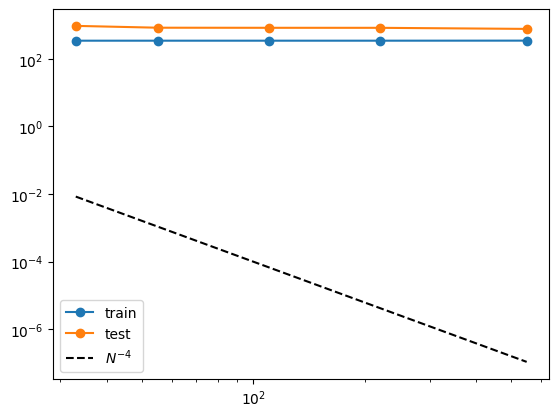

In [28]:
import numpy as np
import matplotlib.pyplot as plt

n_params = np.array(grids) * (4*2+2*1+1*1)
plt.plot(n_params, train_rmse, marker="o")
plt.plot(n_params, test_rmse, marker="o")
plt.plot(n_params, 10000*n_params**(-4.), color="black", ls="--")
plt.legend(['train', 'test', r'$N^{-4}$'], loc="lower left")
plt.xscale('log')
plt.yscale('log')
print(train_rmse)
print(test_rmse)

In [29]:
model.auto_symbolic()

fixing (0,0,0) with 0, r2=0.0, c=0
fixing (0,0,1) with sin, r2=0.9981764554977417, c=2
fixing (0,1,0) with 0, r2=0.0, c=0
fixing (0,1,1) with 0, r2=0.0, c=0
fixing (0,2,0) with cos, r2=0.9991976022720337, c=2
fixing (0,2,1) with 0, r2=0.0, c=0
fixing (0,3,0) with 0, r2=0.0, c=0
fixing (0,3,1) with 0, r2=0.0, c=0
fixing (1,0,0) with 0, r2=0.0, c=0
fixing (1,1,0) with 0, r2=0.0, c=0
fixing (2,0,0) with exp, r2=0.9979711771011353, c=2
saving model version 0.13


In [30]:
ex_round(model.symbolic_formula()[0][0],4)

23.5241